# 读取数据集

这个数据集来源于：https://docs.google.com/forms/d/e/1FAIpQLScLxUSEoEbmM2w8UhN3D388TzQMqCLCAvxdR2hu8O-YoZbgIQ/formResponse?pli=1


| 攻击类型 | 总数 | 正常数量 | 恶意数量 |
| :---------- | :------------ | :------------------- | :--------------------- |
| DoS Attack                  | 3,665,771 | 3,078,250 | 587,521 |
| Fuzzy Attack                | 3,838,860 | 3,347,013 | 491,847 |
| Spoofing the drive gear     | 4,443,142 | 3,845,890 | 597,252 |
| Spoofing the RPM gauze      | 4,621,702 | 3,966,805 | 654,897 |
| GIDS: Attack-free  (normal) | 988,987   | 988,872   |         |

如果已经处理好了一份`Car_Hacking_100%.csv`数据集,可以直接跳到`2 数据探索部分`加载这个csv,`3 划分数据集`部分提供了5中不同的数据集处理方案

运行的conda环境是base

In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import os
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## 干净数据

In [2]:
import pandas as pd

# 定义列名

In [3]:
column_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
csv_files = ['~/data/DoS_dataset.csv', '~/data/RPM_dataset.csv','~/data/gear_dataset.csv','~/data/Fuzzy_dataset.csv']

all_data = pd.DataFrame()

In [4]:
for file in csv_files:
    df = pd.read_csv(file,names=column_names)
    all_data = pd.concat([all_data, df])

all_data=all_data.loc[all_data['Flag'] == 'R']
all_data

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3838855,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3838856,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3838857,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3838858,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


In [5]:
all_data=all_data.drop_duplicates() # 去掉重复值 
all_data

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...,...
2947787,1.478198e+09,0260,8,19,21,21,30,08,8e,6f,28,R
2947788,1.478198e+09,02a0,8,44,00,9a,1d,97,02,bd,00,R
2947789,1.478198e+09,0329,8,dc,ba,7f,14,11,20,00,14,R
2947790,1.478198e+09,0370,8,00,20,00,00,00,00,00,00,R


In [6]:
all_data.loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].max()

CAN ID     07e9
DATA[0]      ff
DATA[1]      fe
DATA[2]      fc
DATA[3]      ff
DATA[4]      ff
DATA[5]      ff
DATA[6]      ff
DATA[7]      ff
dtype: object

In [7]:
all_data.loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].min()

CAN ID     0002
DATA[0]      00
DATA[1]      00
DATA[2]      00
DATA[3]      00
DATA[4]      00
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object

In [8]:
all_data=all_data.loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]','Flag']]
new_header = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Label']
all_data.columns = new_header

In [9]:
columns_to_convert = ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
all_data[columns_to_convert]=all_data[columns_to_convert].applymap(lambda x: int(x, 16) if isinstance(x, str) else int(str(x),16))

all_data

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,790,5,33,104,9,33,33,0,111,R
1,399,254,91,0,0,0,60,0,0,R
2,608,25,33,34,48,8,142,109,58,R
3,672,100,0,154,29,151,2,189,0,R
4,809,64,187,127,20,17,32,0,20,R
...,...,...,...,...,...,...,...,...,...,...
2947787,608,25,33,33,48,8,142,111,40,R
2947788,672,68,0,154,29,151,2,189,0,R
2947789,809,220,186,127,20,17,32,0,20,R
2947790,880,0,32,0,0,0,0,0,0,R


In [10]:
all_data.to_csv('~/data/normal_dataset.csv',index=False)

## 4种攻击

In [11]:
import pandas as pd

def read_raw_data(tag_name,data_name,new_data_name):
    column_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
    df=pd.read_csv(data_name, names=column_names)
    print(df.Flag.value_counts())
    print('min:\n{}\t max:\n{}'.format(df.loc[df['Flag'] == 'T'].loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].min()
    ,df.loc[df['Flag'] == 'T'].loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].max()))
    df_evil=df.loc[df['Flag'] == 'T'].loc[:, ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]','Flag']]

    df_evil.loc[:, 'Flag'] = tag_name
    new_header = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Label']
    df_evil.columns = new_header

    columns_to_convert = ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
    df_evil[columns_to_convert]=df_evil[columns_to_convert].applymap(lambda x: int(x, 16) if isinstance(x, str) else int(str(x),16))
    df_evil.to_csv(new_data_name,index=False)
    print(df_evil)

In [12]:
read_raw_data('DoS','~/data/DoS_dataset.csv','~/data/DoS_dataset_attack.csv')

R    3047062
T     587521
Name: Flag, dtype: int64
min:
CAN ID     0000
DATA[0]      00
DATA[1]      00
DATA[2]      00
DATA[3]      00
DATA[4]      00
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object	 max:
CAN ID     0000
DATA[0]      00
DATA[1]      00
DATA[2]      00
DATA[3]      00
DATA[4]      00
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object
         CAN ID  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  DATA[5]  \
1476          0        0        0        0        0        0        0   
1478          0        0        0        0        0        0        0   
1480          0        0        0        0        0        0        0   
1482          0        0        0        0        0        0        0   
1484          0        0        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
2675669       0        0        0        0        0        0        0   
2675670       0        0        0     

In [13]:
read_raw_data('RPM','~/data/RPM_dataset.csv','~/data/RPM_dataset_attack.csv')

R    3925329
T     654897
Name: Flag, dtype: int64
min:
CAN ID     0316
DATA[0]      45
DATA[1]      29
DATA[2]      24
DATA[3]      ff
DATA[4]      29
DATA[5]      24
DATA[6]      00
DATA[7]      ff
dtype: object	 max:
CAN ID     0316
DATA[0]      45
DATA[1]      29
DATA[2]      24
DATA[3]      ff
DATA[4]      29
DATA[5]      24
DATA[6]      00
DATA[7]      ff
dtype: object
         CAN ID  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  DATA[5]  \
1708        790       69       41       36      255       41       36   
1711        790       69       41       36      255       41       36   
1712        790       69       41       36      255       41       36   
1713        790       69       41       36      255       41       36   
1716        790       69       41       36      255       41       36   
...         ...      ...      ...      ...      ...      ...      ...   
3710694     790       69       41       36      255       41       36   
3710696     790       69       41     

In [14]:
read_raw_data('gear','~/data/gear_dataset.csv','~/data/gear_dataset_attack.csv')

R    3805725
T     597252
Name: Flag, dtype: int64
min:
CAN ID     043f
DATA[0]      01
DATA[1]      45
DATA[2]      60
DATA[3]      ff
DATA[4]      6b
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object	 max:
CAN ID     043f
DATA[0]      01
DATA[1]      45
DATA[2]      60
DATA[3]      ff
DATA[4]      6b
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object
         CAN ID  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  DATA[5]  \
2140       1087        1       69       96      255      107        0   
2141       1087        1       69       96      255      107        0   
2142       1087        1       69       96      255      107        0   
2144       1087        1       69       96      255      107        0   
2150       1087        1       69       96      255      107        0   
...         ...      ...      ...      ...      ...      ...      ...   
3528824    1087        1       69       96      255      107        0   
3528831    1087        1       69     

In [15]:
read_raw_data('Fuzzy','~/data/Fuzzy_dataset.csv','~/data/Fuzzy_dataset_attack.csv')

R    3259177
T     491847
Name: Flag, dtype: int64
min:
CAN ID     0000
DATA[0]      00
DATA[1]      00
DATA[2]      00
DATA[3]      00
DATA[4]      00
DATA[5]      00
DATA[6]      00
DATA[7]      00
dtype: object	 max:
CAN ID     07ff
DATA[0]      ff
DATA[1]      ff
DATA[2]      ff
DATA[3]      ff
DATA[4]      ff
DATA[5]      ff
DATA[6]      ff
DATA[7]      ff
dtype: object
         CAN ID  DATA[0]  DATA[1]  DATA[2]  DATA[3]  DATA[4]  DATA[5]  \
1567        223      140      171      242       38      122       41   
1568       1770       37       16      156      237       91       22   
1569        765       63      189      104      243      195       79   
1576        301       53       69      153      207        9      128   
1580        826       28        4      134      144      127        8   
...         ...      ...      ...      ...      ...      ...      ...   
2930194    1297       86       56       18       97      239      185   
2930197    1947      102      213     

## 合并所有的数据

In [16]:
import pandas as pd

csv_files = ['DoS_dataset_attack.csv', 'Fuzzy_dataset_attack.csv', 'gear_dataset_attack.csv','RPM_dataset_attack.csv','normal_dataset.csv']
all_data = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv('~/data/'+file)
    all_data = pd.concat([all_data, df])

all_data

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0,0,0,0,0,0,0,0,0,DoS
1,0,0,0,0,0,0,0,0,0,DoS
2,0,0,0,0,0,0,0,0,0,DoS
3,0,0,0,0,0,0,0,0,0,DoS
4,0,0,0,0,0,0,0,0,0,DoS
...,...,...,...,...,...,...,...,...,...,...
11392944,608,25,33,33,48,8,142,111,40,R
11392945,672,68,0,154,29,151,2,189,0,R
11392946,809,220,186,127,20,17,32,0,20,R
11392947,880,0,32,0,0,0,0,0,0,R


In [17]:
all_data.to_csv('~/data/Car_Hacking_100%.csv',index=False)
# 现在，all_data包含了所有文件的数据

# 数据探索

## 查看每一类的数据量

原来的数据量是818,440条，现在扩充后是13,724,466条

In [18]:
import pandas as pd

df = pd.read_csv('~/data/Car_Hacking_100%.csv')
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0,0,0,0,0,0,0,0,0,DoS
1,0,0,0,0,0,0,0,0,0,DoS
2,0,0,0,0,0,0,0,0,0,DoS
3,0,0,0,0,0,0,0,0,0,DoS
4,0,0,0,0,0,0,0,0,0,DoS
...,...,...,...,...,...,...,...,...,...,...
13724461,608,25,33,33,48,8,142,111,40,R
13724462,672,68,0,154,29,151,2,189,0,R
13724463,809,220,186,127,20,17,32,0,20,R
13724464,880,0,32,0,0,0,0,0,0,R


In [19]:
df.Label.value_counts()/13724466*100

R        83.011966
RPM       4.771748
gear      4.351732
DoS       4.280830
Fuzzy     3.583724
Name: Label, dtype: float64

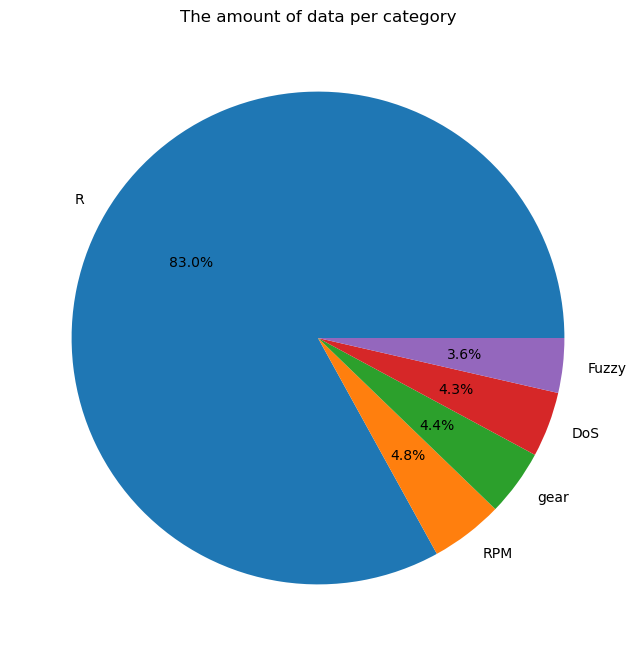

In [20]:
import matplotlib.pyplot as plt                #导入绘图包

a=df.Label.value_counts()/13724466*100
a.to_numpy()
plt.figure(figsize=(8,8))
plt.pie(a,labels=['R','RPM','gear','DoS','Fuzzy'], autopct='%3.1f%%')  #以时间为标签，总计成交笔数为数据绘制饼图，并显示3位整数一位小数
plt.title('The amount of data per category')             #加标题
plt.show()

## 原始特征直方图

蓝色的是car id `CAN ID : identifier of CAN message in HEX (ex. 043f)` 感觉没有什么用

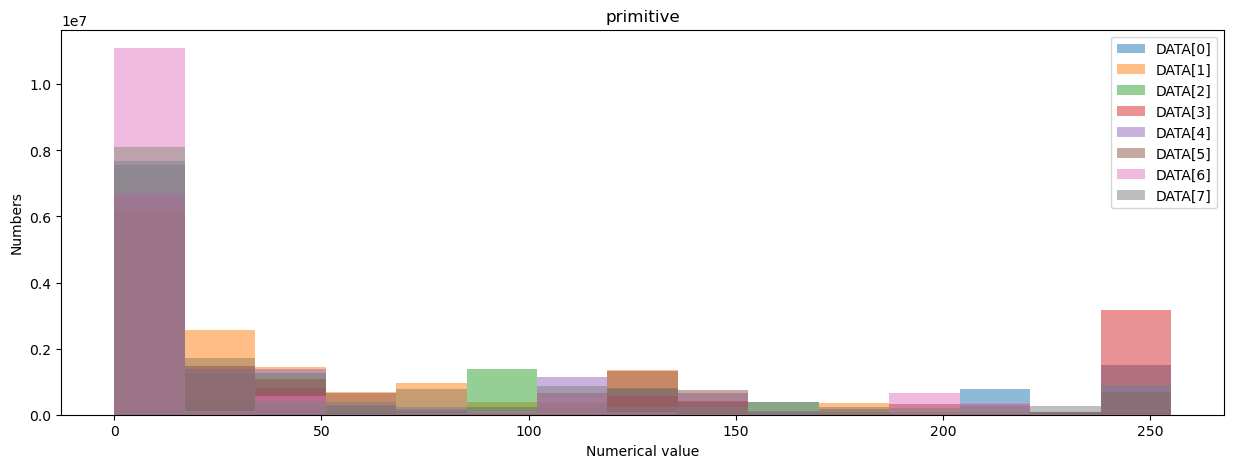

In [21]:
# from PIL import Image, ImageStat
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

for i in range(1,9):
    plt.hist(df.iloc[:,i], bins=15,alpha = 0.5,label=str(df.columns.tolist()[i]))
plt.xlabel("Numerical value")
plt.ylabel("Numbers")
plt.tick_params(top=False, right=False)
plt.title('primitive')
plt.legend()
plt.show()

## QQ曲线

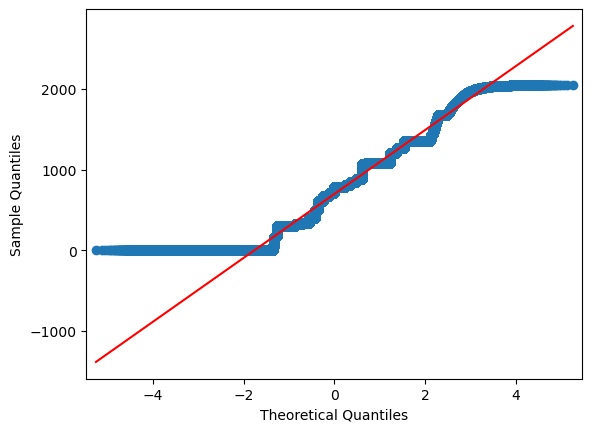

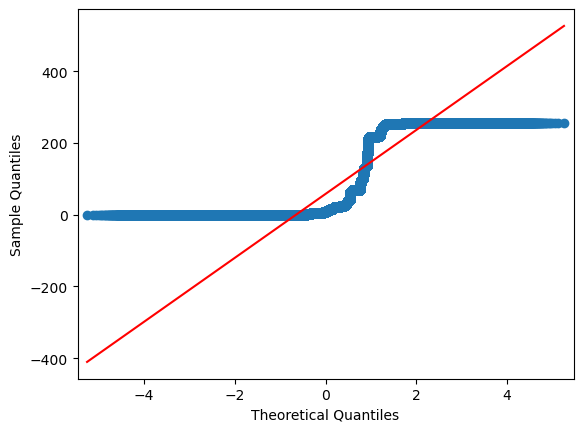

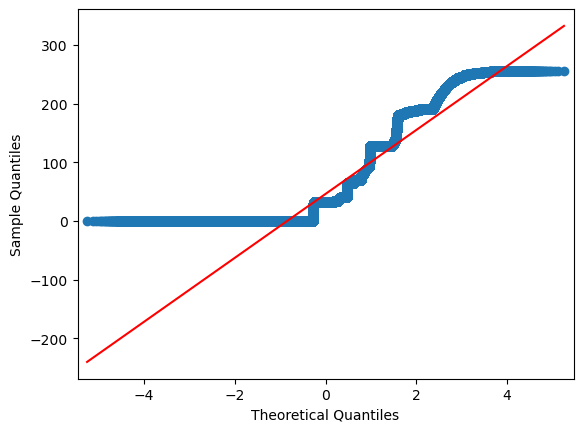

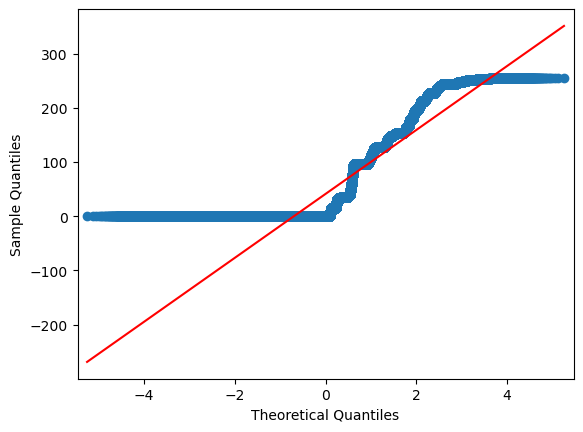

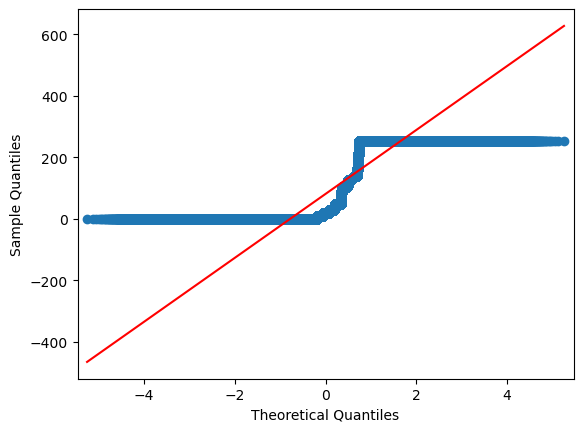

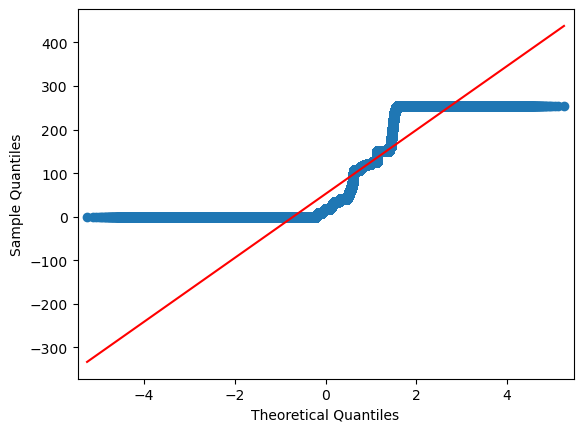

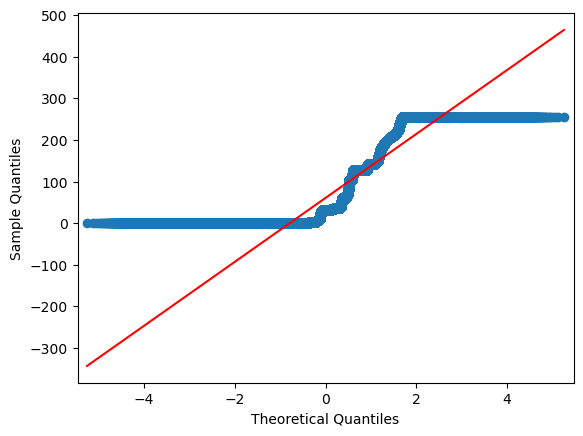

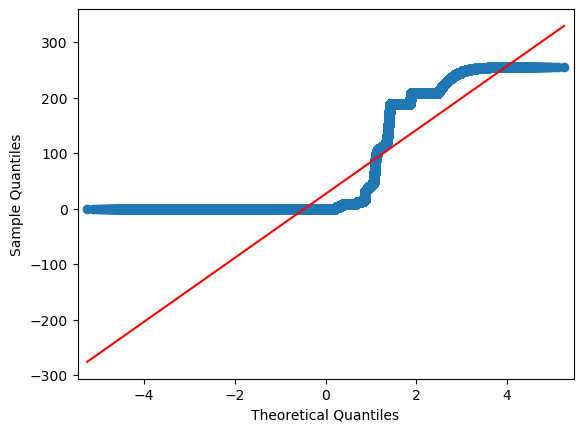

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
for i in range(8):
    sm.qqplot(df.iloc[:,i], line='s')

# 划分数据集

##  QuantileTransformer转换

### 标准化

In [2]:
import pandas as pd
qt_df=pd.read_csv('~/data/Car_Hacking_100%.csv')
qt_df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0,0,0,0,0,0,0,0,0,DoS
1,0,0,0,0,0,0,0,0,0,DoS
2,0,0,0,0,0,0,0,0,0,DoS
3,0,0,0,0,0,0,0,0,0,DoS
4,0,0,0,0,0,0,0,0,0,DoS
...,...,...,...,...,...,...,...,...,...,...
13724461,608,25,33,33,48,8,142,111,40,R
13724462,672,68,0,154,29,151,2,189,0,R
13724463,809,220,186,127,20,17,32,0,20,R
13724464,880,0,32,0,0,0,0,0,0,R


In [6]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
numeric_features=['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
qt_df[numeric_features] = scaler.fit_transform(qt_df[numeric_features])
qt_df[numeric_features].describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07
mean,4.992747e-01,4.457913e-01,4.242760e-01,3.567103e-01,4.346564e-01,4.162880e-01,4.384124e-01,3.298086e-01,3.642480e-01
std,2.892569e-01,3.521573e-01,3.656143e-01,3.947827e-01,4.080485e-01,3.736503e-01,3.575232e-01,3.983426e-01,3.932580e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.627628e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.440440e-01,4.964965e-01,5.395395e-01,0.000000e+00,5.045045e-01,5.140140e-01,5.095095e-01,0.000000e+00,0.000000e+00
75%,7.437437e-01,7.522523e-01,7.567568e-01,7.822823e-01,7.492492e-01,7.547548e-01,7.517518e-01,7.532533e-01,7.457457e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


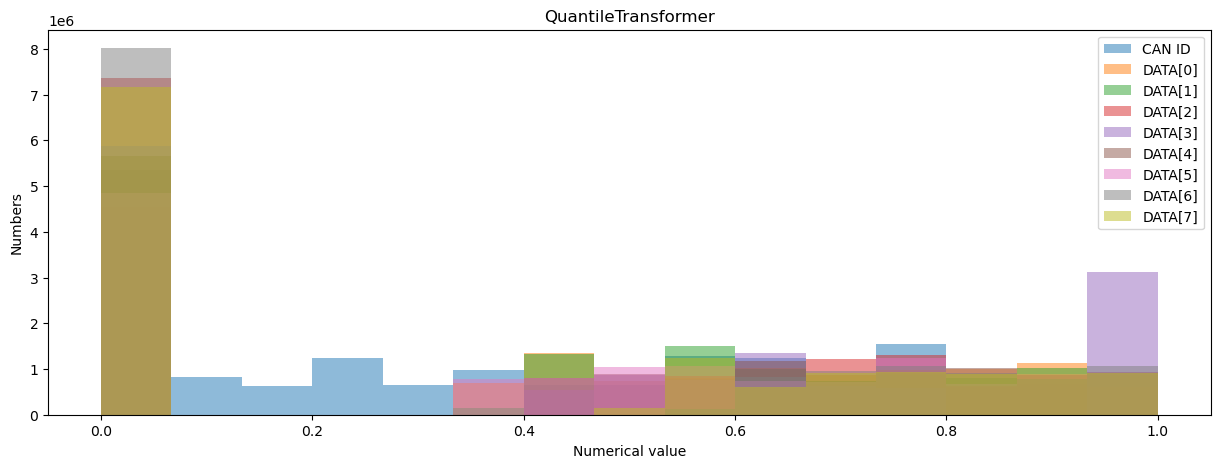

In [9]:
def showPicture(name_):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    for i in range(9):
        plt.hist(qt_df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(qt_df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top=False, right=False)
    plt.title(name_)
    plt.legend()
    plt.show()

showPicture('QuantileTransformer')

### 降采样

In [10]:
X=qt_df[numeric_features]
y=qt_df['Label']

from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

qt_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(qt_df.Label.value_counts())

DoS      491847
Fuzzy    491847
R        491847
RPM      491847
gear     491847
Name: Label, dtype: int64


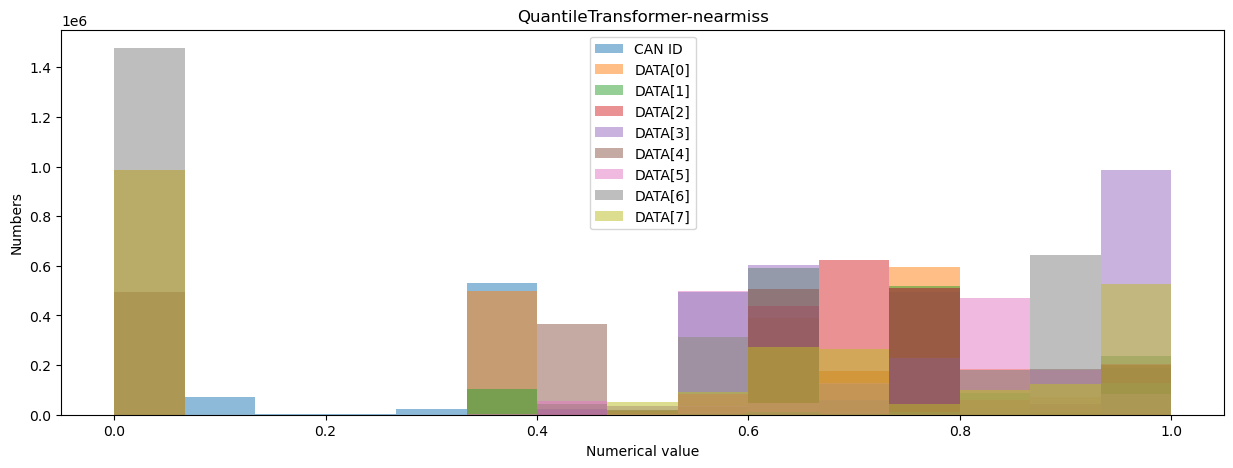

In [11]:
showPicture('QuantileTransformer-nearmiss')

### 归一化

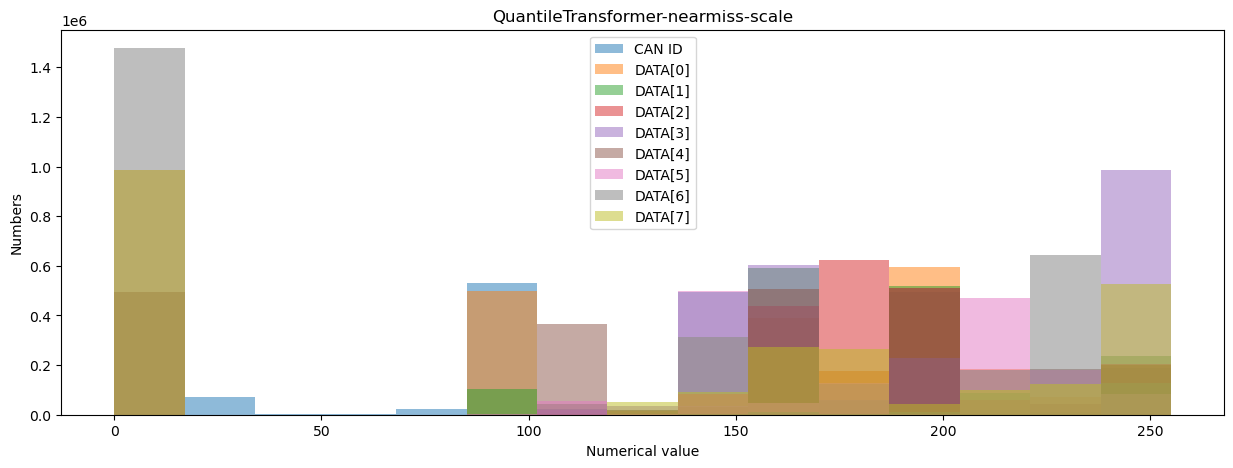

In [12]:
qt_df[numeric_features] = qt_df[numeric_features].apply(lambda x: (x*255))

showPicture('QuantileTransformer-nearmiss-scale')

### 分类

In [13]:
df0=qt_df[qt_df['Label']=='R'].drop(['Label'],axis=1)
df1=qt_df[qt_df['Label']=='RPM'].drop(['Label'],axis=1)
df2=qt_df[qt_df['Label']=='gear'].drop(['Label'],axis=1)
df3=qt_df[qt_df['Label']=='DoS'].drop(['Label'],axis=1)
df4=qt_df[qt_df['Label']=='Fuzzy'].drop(['Label'],axis=1)

### 原始图像生成

In [14]:
import os
def generate_image(DF,ditrr, image_p):
    count=0 # 定义一个计数器，用来记录读取的数据个数
    ims = [] # 定义一个空列表，用来存储读取的数据
    image_path = ditrr + image_p # 定义一个变量，用来表示图片的保存路径，由两个字符串拼接而成
    os.makedirs(image_path,exist_ok=True) # 调用os模块的makedirs函数，创建图片的保存路径，如果路径已存在，则不报错

    for i in range(0, len(DF)): # 用for循环遍历数据框的索引，从0到数据框的长度
        count=count+1 # 每遍历一个索引，计数器加一
        if count<=27: # 如果计数器小于等于27，说明还没有读取足够的数据
            im=DF.iloc[i].values # 用iloc函数根据索引获取数据框的一行数据，返回一个数组
            ims=np.append(ims,im) # 用np.append函数将数组添加到列表中
        else: # 如果计数器大于27，说明已经读取了27个数据
            ims=np.array(ims).reshape(9,9,3) # 用np.array函数将列表转换为一个一维数组，然后用reshape函数将数组重塑为一个9x9x3的三维数组
            array = np.array(ims, dtype=np.uint8) # 用np.array函数将三维数组转换为一个无符号8位整数类型的数组，这是图片的数据类型
            new_image = Image.fromarray(array) # 用Image模块的fromarray函数将数组转换为一张图片
            new_image.save(image_path+str(i)+'.png') # 用save函数将图片保存到指定的路径，图片的名字由路径、索引和后缀拼接而成
            # 图像放大
#             img = cv2.imread(image_path+str(i)+'.png')
#             img = cv2.resize(img, (224, 224))
#             cv2.imwrite(image_path+str(i)+'.png', img)
            count=0 # 重置计数器为0，准备读取下一批数据
            ims = [] # 重置列表为空，准备存储下一批数据

generate_image(df0,ditrr='/home/raoxy/data/train_qt/',image_p = "0/") # normal021
generate_image(df1,ditrr='/home/raoxy/data/train_qt/',image_p = "1/")
generate_image(df2,ditrr='/home/raoxy/data/train_qt/',image_p = "2/")
generate_image(df3,ditrr='/home/raoxy/data/train_qt/',image_p = "3/") # dos attack
generate_image(df4,ditrr='/home/raoxy/data/train_qt/',image_p = "4/") # fuzzy attack

NameError: name 'np' is not defined

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/home/raoxy/data/train_qt/0/27.png')
img2 = Image.open('/home/raoxy/data/train_qt/1/83.png')
img3 = Image.open('/home/raoxy/data/train_qt/2/27.png')
img4 = Image.open('/home/raoxy/data/train_qt/3/27.png')
img5 = Image.open('/home/raoxy/data/train_qt/4/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  

### 数据集划分

In [ ]:
Train_Dir='/home/raoxy/data/train_qt/'

def count_img(Train_Dir):
    allimgs = []
    for subdir in os.listdir(Train_Dir):
        for filename in os.listdir(os.path.join(Train_Dir, subdir)):
            filepath = os.path.join(Train_Dir, subdir, filename)
            allimgs.append(filepath)
    return allimgs

allimgs = count_img(Train_Dir)
print('总图片数量：', len(allimgs))

In [ ]:
Numbers,Numbers_=len(allimgs)//5,len(allimgs)//5

print("测试集 | {} ({:.4f})  \n验证集 | {} ({:.4f})\n训练集 | {} ({:.4f})".format(Numbers,Numbers/len(allimgs), Numbers_,Numbers_/len(allimgs), len(allimgs)-Numbers-Numbers,  (len(allimgs)-Numbers-Numbers_)/len(allimgs)))

In [ ]:
def mymovefile(srcfile, dstfile):
    if not os.path.isfile(srcfile):
        print("%s not exist!" % (srcfile))
    else:
        fpath, fname = os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile, dstfile)

def split_imag_data(allimgs, Numbers, Train_Dir, Val_Dir):
    val_imgs = random.sample(allimgs, Numbers)
    for img in val_imgs:
        dest_path = img.replace(Train_Dir, Val_Dir)
        mymovefile(img, dest_path)

In [ ]:
Test_Dir = '/home/raoxy/data/test_qt/'

split_imag_data(allimgs, Numbers, Train_Dir, Test_Dir)
print('Finish creating test set')

In [ ]:
Verify_Dir = '/home/raoxy/data/verify_qt/'

allimgs = count_img(Train_Dir) # 更新一下现在的训练集
split_imag_data(allimgs, Numbers_, Train_Dir, Verify_Dir)
print('Finish creating verify set')

## yeo-johnson转换

In [1]:
import pandas as pd
import numpy as np

yeo_df=pd.read_csv('~/data/Car_Hacking_100%.csv')
np.random.shuffle(yeo_df.values)

In [2]:
# 保存到新的csv文件中
yeo_df.to_csv('~/data/Car_Hacking_100%.csv', index=False)
yeo_df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0,0,0,0,0,0,0,0,0,DoS
1,0,0,0,0,0,0,0,0,0,DoS
2,0,0,0,0,0,0,0,0,0,DoS
3,0,0,0,0,0,0,0,0,0,DoS
4,0,0,0,0,0,0,0,0,0,DoS
...,...,...,...,...,...,...,...,...,...,...
13724461,608,25,33,33,48,8,142,111,40,R
13724462,672,68,0,154,29,151,2,189,0,R
13724463,809,220,186,127,20,17,32,0,20,R
13724464,880,0,32,0,0,0,0,0,0,R


### 标准化

In [3]:
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

numeric_features=['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
scaler = PowerTransformer(method='yeo-johnson')
yeo_df[numeric_features]=scaler.fit_transform(yeo_df[numeric_features])

yeo_df[numeric_features].describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07,1.372447e+07
mean,-1.182099e-12,-5.956312e-13,1.011844e-12,-1.000090e-11,-5.497016e-12,-5.259227e-12,2.172820e-12,-2.628656e-13,1.004613e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.170469e+00,-1.175371e+00,-1.190249e+00,-9.102339e-01,-1.084231e+00,-1.103275e+00,-1.174072e+00,-8.127942e-01,-9.279341e-01
25%,-7.794096e-01,-1.175371e+00,-1.190249e+00,-9.102339e-01,-1.084231e+00,-1.103275e+00,-1.174072e+00,-8.127942e-01,-9.279341e-01
50%,3.218605e-01,-1.015534e-02,3.908419e-01,-9.102339e-01,2.036593e-01,2.580688e-01,3.760168e-01,-8.127942e-01,-9.279341e-01
75%,9.029543e-01,9.190788e-01,8.179286e-01,1.183330e+00,9.873751e-01,1.074041e+00,1.049622e+00,9.696242e-01,1.148528e+00
max,2.616551e+00,1.437650e+00,1.697180e+00,1.448202e+00,1.233727e+00,1.459646e+00,1.411182e+00,1.644495e+00,1.376416e+00


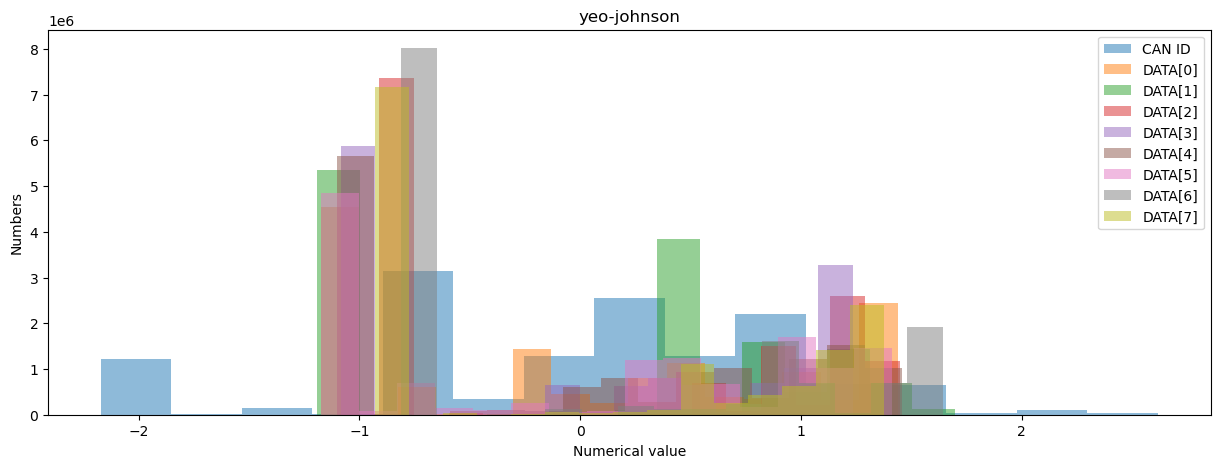

In [4]:
def showPicture(name_):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    for i in range(9):
        plt.hist(yeo_df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(yeo_df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top=False, right=False)
    plt.title(name_)
    plt.legend()
    plt.show()

showPicture('yeo-johnson')

### 降采样

降采样后原始数据13724466 条，降为2459235条。下降了18%

In [5]:
X=yeo_df[numeric_features]
y=yeo_df['Label']

X

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
0,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934
1,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934
2,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934
3,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934
4,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934
...,...,...,...,...,...,...,...,...,...
13724461,-0.088889,0.488037,0.390842,0.841139,0.555447,-0.063267,1.106629,1.548710,0.832635
13724462,0.059518,0.913040,-1.190249,1.316942,0.352095,1.227304,-0.714443,1.614074,-0.927934
13724463,0.362894,1.381329,1.469930,1.263718,0.203659,0.258069,0.376017,-0.812794,0.589417
13724464,0.513594,-1.175371,0.374064,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934


In [6]:
from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

yeo_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(yeo_df.Label.value_counts())

DoS      491847
Fuzzy    491847
R        491847
RPM      491847
gear     491847
Name: Label, dtype: int64


In [7]:
yeo_df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934,DoS
1,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934,DoS
2,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934,DoS
3,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934,DoS
4,-2.170469,-1.175371,-1.190249,-0.910234,-1.084231,-1.103275,-1.174072,-0.812794,-0.927934,DoS
...,...,...,...,...,...,...,...,...,...,...
2459230,0.932391,-0.787105,0.817929,1.183330,1.233727,1.074041,-1.174072,-0.812794,-0.927934,gear
2459231,0.932391,-0.787105,0.817929,1.183330,1.233727,1.074041,-1.174072,-0.812794,-0.927934,gear
2459232,0.932391,-0.787105,0.817929,1.183330,1.233727,1.074041,-1.174072,-0.812794,-0.927934,gear
2459233,0.932391,-0.787105,0.817929,1.183330,1.233727,1.074041,-1.174072,-0.812794,-0.927934,gear


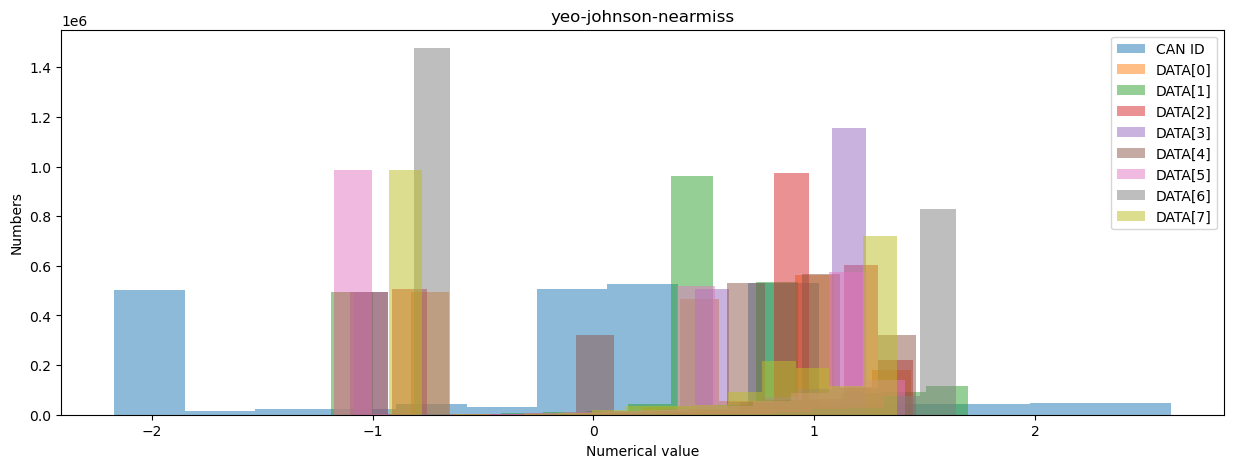

In [8]:
showPicture('yeo-johnson-nearmiss')

### 归一化

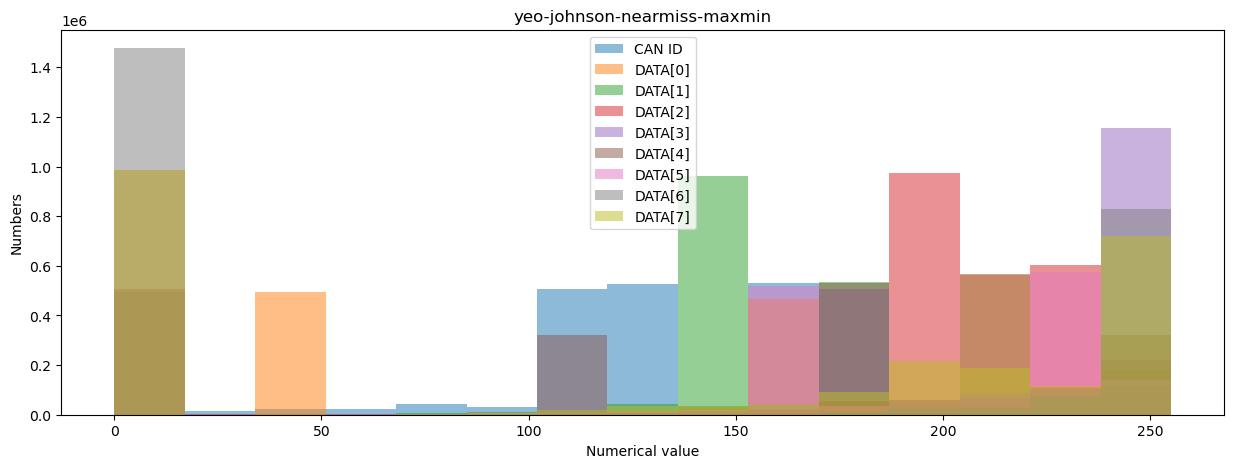

In [9]:
from sklearn.preprocessing import minmax_scale
yeo_df[numeric_features]=minmax_scale(yeo_df[numeric_features])
yeo_df[numeric_features] = yeo_df[numeric_features].apply(lambda x: (x*255))

showPicture('yeo-johnson-nearmiss-maxmin')

### 分类

In [10]:
def data_classification(df):
    df0=df[df['Label']=='R'].drop(['Label'],axis=1)
    df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
    df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
    df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
    df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)
    return df0,df1,df2,df3,df4

df0,df1,df2,df3,df4=data_classification(yeo_df.copy(deep=True))

### 原始图像生成

这段代码的功能是从一个数据框（DF）中读取数据，并将每27个数据组成一个9x9x3的数组，然后将数组转换为图片，并保存到指定的文件夹中。

`pip install opencv-contrib-python==3.4.14.53`


In [11]:
import cv2
import os
from PIL import Image
def generate_image(DF,ditrr='/home/raoxy/data/train_yeo/', image_p = ""):
    count=0 # 定义一个计数器，用来记录读取的数据个数
    ims = [] # 定义一个空列表，用来存储读取的数据
    image_path = ditrr + image_p # 定义一个变量，用来表示图片的保存路径，由两个字符串拼接而成
    os.makedirs(image_path,exist_ok=True) # 调用os模块的makedirs函数，创建图片的保存路径，如果路径已存在，则不报错

    for i in range(0, len(DF)): # 用for循环遍历数据框的索引，从0到数据框的长度
        count=count+1 # 每遍历一个索引，计数器加一
        if count<=27: # 如果计数器小于等于27，说明还没有读取足够的数据
            im=DF.iloc[i].values # 用iloc函数根据索引获取数据框的一行数据，返回一个数组
            ims=np.append(ims,im) # 用np.append函数将数组添加到列表中
        else: # 如果计数器大于27，说明已经读取了27个数据
            ims=np.array(ims).reshape(9,9,3) # 用np.array函数将列表转换为一个一维数组，然后用reshape函数将数组重塑为一个9x9x3的三维数组
            array = np.array(ims, dtype=np.uint8) # 用np.array函数将三维数组转换为一个无符号8位整数类型的数组，这是图片的数据类型
            new_image = Image.fromarray(array) # 用Image模块的fromarray函数将数组转换为一张图片
            new_image.save(image_path+str(i)+'.png') # 用save函数将图片保存到指定的路径，图片的名字由路径、索引和后缀拼接而成
            # 图像放大
#             img = cv2.imread(image_path+str(i)+'.png')
#             img = cv2.resize(img, (224, 224))
#             cv2.imwrite(image_path+str(i)+'.png', img)
#             new_image = Image.fromarray(array)
#             new_image.save(image_path+str(i)+'.png')
            count=0 # 重置计数器为0，准备读取下一批数据
            ims = [] # 重置列表为空，准备存储下一批数据


generate_image(df0,image_p = "0/") # normal
generate_image(df1,image_p = "1/")
generate_image(df2,image_p = "2/")
generate_image(df3,image_p = "3/") # dos attack
generate_image(df4,image_p = "4/") # fuzzy attack

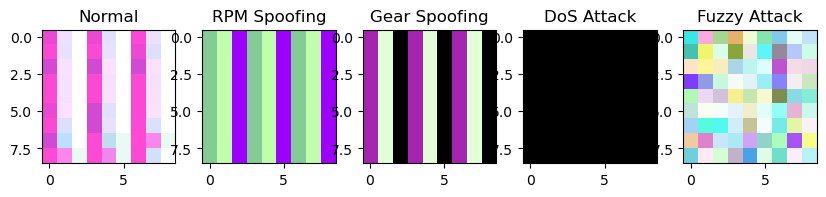

In [12]:
import matplotlib.pyplot as plt

# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/home/raoxy/data/train_yeo/0/27.png')
img2 = Image.open('/home/raoxy/data/train_yeo/1/83.png')
img3 = Image.open('/home/raoxy/data/train_yeo/2/27.png')
img4 = Image.open('/home/raoxy/data/train_yeo/3/27.png')
img5 = Image.open('/home/raoxy/data/train_yeo/4/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  

### 数据集划分

In [13]:
import os
import random
import shutil
import warnings
warnings.filterwarnings("ignore")

In [14]:
Train_Dir='/home/raoxy/data/train_yeo/'

def count_img(Train_Dir):
    allimgs = []
    for subdir in os.listdir(Train_Dir):
        for filename in os.listdir(os.path.join(Train_Dir, subdir)):
            filepath = os.path.join(Train_Dir, subdir, filename)
            allimgs.append(filepath)
    return allimgs

allimgs = count_img(Train_Dir)
print('总图片数量：', len(allimgs))

总图片数量： 87825


划分比例 训练集 | 测试集 | 验证集：6:2:2。原始论文生成4395张图片，现在有87825张，数据放大了19倍

In [15]:
Numbers,Numbers_=len(allimgs)//5,len(allimgs)//5

print("测试集 | {} ({:.4f})  \n验证集 | {} ({:.4f})\n训练集 | {} ({:.4f})".format(Numbers,Numbers/len(allimgs), Numbers_,Numbers_/len(allimgs), len(allimgs)-Numbers-Numbers,  (len(allimgs)-Numbers-Numbers_)/len(allimgs)))

测试集 | 17565 (0.2000)  
验证集 | 17565 (0.2000)
训练集 | 52695 (0.6000)


In [16]:
def mymovefile(srcfile, dstfile):
    if not os.path.isfile(srcfile):
        print("%s not exist!" % (srcfile))
    else:
        fpath, fname = os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile, dstfile)

def split_imag_data(allimgs, Numbers, Train_Dir, Val_Dir):
    val_imgs = random.sample(allimgs, Numbers)
    for img in val_imgs:
        dest_path = img.replace(Train_Dir, Val_Dir)
        mymovefile(img, dest_path)

In [17]:
Test_Dir = '/home/raoxy/data/test_yeo/'

split_imag_data(allimgs, Numbers, Train_Dir, Test_Dir)
print('Finish creating test set')

Finish creating test set


In [18]:
Verify_Dir = '/home/raoxy/data/verify_yeo/'

allimgs = count_img(Train_Dir) # 更新一下现在的训练集
split_imag_data(allimgs, Numbers_, Train_Dir, Verify_Dir)
print('Finish creating verify set')

Finish creating verify set


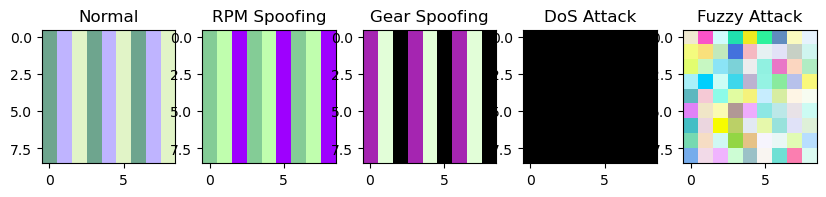

In [20]:
import matplotlib.pyplot as plt

# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/home/raoxy/data/train_yeo/0/2799.png')
img2 = Image.open('/home/raoxy/data/train_yeo/1/243179.png')
img3 = Image.open('/home/raoxy/data/train_yeo/2/200787.png')
img4 = Image.open('/home/raoxy/data/train_yeo/3/180095.png')
img5 = Image.open('/home/raoxy/data/train_yeo/4/20075.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  

<!-- ### 图像放大

```
pip install opencv-contrib-python==3.4.14.53
``` -->

## QuantileTransformer-正则转换

### 标准化

In [ ]:
import pandas as pd
import numpy as np

qtn_df=pd.read_csv('~/data/Car_Hacking_100%.csv')
np.random.shuffle(qtn_df.values)
# 保存到新的csv文件中
qtn_df.to_csv('~/data/Car_Hacking_100%.csv', index=False)
qtn_df

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
numeric_features=['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
qtn_df[numeric_features] = scaler.fit_transform(qtn_df[numeric_features])

In [ ]:
qtn_df[numeric_features].describe()

In [ ]:
showPicture('QuantileTransformer-normal')

### 降采样

In [ ]:
X=qtn_df[numeric_features]
y=qtn_df['Label']

from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

qtn_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(qtn_df.Label.value_counts())

In [ ]:
showPicture('QuantileTransformer-normal-nearmiss')

### 归一化

In [ ]:
from sklearn.preprocessing import minmax_scale
qtn_df[numeric_features]=minmax_scale(qtn_df[numeric_features])
qtn_df[numeric_features] = qtn_df[numeric_features].apply(lambda x: (x*255))

In [ ]:
showPicture('QuantileTransformer-normal-nearmiss-maxmin')

### 分类

In [ ]:
df0=qtn_df[qtn_df['Label']=='R'].drop(['Label'],axis=1)
df1=qtn_df[qtn_df['Label']=='RPM'].drop(['Label'],axis=1)
df2=qtn_df[qtn_df['Label']=='gear'].drop(['Label'],axis=1)
df3=qtn_df[qtn_df['Label']=='DoS'].drop(['Label'],axis=1)
df4=qtn_df[qtn_df['Label']=='Fuzzy'].drop(['Label'],axis=1)

###  原始图像生成

In [ ]:
def generate_image(DF,ditrr='/home/raoxy/data/train_qnt/', image_p = ""):
    count=0 # 定义一个计数器，用来记录读取的数据个数
    ims = [] # 定义一个空列表，用来存储读取的数据
    image_path = ditrr + image_p # 定义一个变量，用来表示图片的保存路径，由两个字符串拼接而成
    os.makedirs(image_path,exist_ok=True) # 调用os模块的makedirs函数，创建图片的保存路径，如果路径已存在，则不报错

    for i in range(0, len(DF)): # 用for循环遍历数据框的索引，从0到数据框的长度
        count=count+1 # 每遍历一个索引，计数器加一
        if count<=27: # 如果计数器小于等于27，说明还没有读取足够的数据
            im=DF.iloc[i].values # 用iloc函数根据索引获取数据框的一行数据，返回一个数组
            ims=np.append(ims,im) # 用np.append函数将数组添加到列表中
        else: # 如果计数器大于27，说明已经读取了27个数据
            ims=np.array(ims).reshape(9,9,3) # 用np.array函数将列表转换为一个一维数组，然后用reshape函数将数组重塑为一个9x9x3的三维数组
            array = np.array(ims, dtype=np.uint8) # 用np.array函数将三维数组转换为一个无符号8位整数类型的数组，这是图片的数据类型
            new_image = Image.fromarray(array) # 用Image模块的fromarray函数将数组转换为一张图片
            new_image.save(image_path+str(i)+'.png') # 用save函数将图片保存到指定的路径，图片的名字由路径、索引和后缀拼接而成
            # 图像放大
#             img = cv2.imread(image_path+str(i)+'.png')
#             img = cv2.resize(img, (224, 224))
#             cv2.imwrite(image_path+str(i)+'.png', img)
            count=0 # 重置计数器为0，准备读取下一批数据
            ims = [] # 重置列表为空，准备存储下一批数据


generate_image(df0,image_p = "0/") # normal
generate_image(df1,image_p = "1/")
generate_image(df2,image_p = "2/")
generate_image(df3,image_p = "3/") # dos attack
generate_image(df4,image_p = "4/") # fuzzy attack

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
# Read the images for each category, the file name may vary (27.png, 83.png...)

img1 = Image.open('/home/raoxy/data/train_qnt/0/27.png')
img2 = Image.open('/home/raoxy/data/train_qnt/1/83.png')
img3 = Image.open('/home/raoxy/data/train_qnt/2/27.png')
img4 = Image.open('/home/raoxy/data/train_qnt/3/27.png')
img5 = Image.open('/home/raoxy/data/train_qnt/4/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  

###  数据集划分

In [ ]:
Train_Dir='/home/raoxy/data/train_qnt/'

def count_img(Train_Dir):
    allimgs = []
    for subdir in os.listdir(Train_Dir):
        for filename in os.listdir(os.path.join(Train_Dir, subdir)):
            filepath = os.path.join(Train_Dir, subdir, filename)
            allimgs.append(filepath)
    return allimgs

allimgs = count_img(Train_Dir)
print('总图片数量：', len(allimgs))

In [ ]:
Numbers,Numbers_=len(allimgs)//5,len(allimgs)//5

print("测试集 | {} ({:.4f})  \n验证集 | {} ({:.4f})\n训练集 | {} ({:.4f})".format(Numbers,Numbers/len(allimgs), Numbers_,Numbers_/len(allimgs), len(allimgs)-Numbers-Numbers,  (len(allimgs)-Numbers-Numbers_)/len(allimgs)))

In [ ]:
def mymovefile(srcfile, dstfile):
    if not os.path.isfile(srcfile):
        print("%s not exist!" % (srcfile))
    else:
        fpath, fname = os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile, dstfile)

def split_imag_data(allimgs, Numbers, Train_Dir, Val_Dir):
    val_imgs = random.sample(allimgs, Numbers)
    for img in val_imgs:
        dest_path = img.replace(Train_Dir, Val_Dir)
        mymovefile(img, dest_path)

In [ ]:
Test_Dir = '/home/raoxy/data/test_qnt/'

split_imag_data(allimgs, Numbers, Train_Dir, Test_Dir)
print('Finish creating test set')

In [ ]:
Verify_Dir = '/home/raoxy/data/verify_qnt/'

allimgs = count_img(Train_Dir) # 更新一下现在的训练集
split_imag_data(allimgs, Numbers_, Train_Dir, Verify_Dir)
print('Finish creating verify set')

## QuantileTransformer转换(没有降采样)

A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles
This is the code for the paper entitled "A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles" accepted in IEEE International Conference on Communications (IEEE ICC).
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

Notebook 1: Data pre-processing
Procedures:
  1): Read the dataset
  2): Transform the tabular data into images
  3): Display the transformed images
  4): Split the training and test set

In [ ]:
Import libraries
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

Read the Car-Hacking/CAN-Intrusion dataset
The complete Car-Hacking dataset is publicly available at: https://ocslab.hksecurity.net/Datasets/CAN-intrusion-dataset
In this repository, due to the file size limit of GitHub, we use the 5% subset.

### Read dataset

In [ ]:
df=pd.read_csv('~/data/Car_Hacking_100%.csv')
df

In [ ]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.Label.value_counts()

Data Transformation
Convert tabular data to images Procedures:

Use quantile transform to transform the original data samples into the scale of [0,255], representing pixel values
Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 993, length 9, width 9, and 3 color channels (RGB).

### Transform all features into the scale of [0,1]

In [ ]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Multiply the feature values by 255 to transform them into the scale of [0,255]

In [ ]:
df[numeric_features] = df[numeric_features].apply(lambda x: (x*255))
df.describe()

All features are in the same scale of [0,255]

### Generate images for each class

In [ ]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [ ]:
# Generate 9*9 color images for class 0 (Normal)
count=0
ims = []

image_path = "/home/raoxy/train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):  
    count=count+1
    if count<=27: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "/home/raoxy/train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=27: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "/home/raoxy/train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=27: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "/home/raoxy/train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=27: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "/home/raoxy/train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=27: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

### Split the training and test set

In [ ]:
# Create folders to store images
Train_Dir='/home/raoxy/train/'
Val_Dir='/home/raoxy/test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

In [ ]:
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))
# The size of test set
Numbers

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='/home/raoxy/train_224/'
get_224(folder='/home/raoxy/train/',dstdir=DATA_DIR_224)

In [ ]:
DATA_DIR2_224='/home/raoxy/test_224/'
get_224(folder='/home/raoxy/test/',dstdir=DATA_DIR2_224)

### Display samples for each category

In [ ]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/home/raoxy/train_224/0/27.png')
img2 = Image.open('/home/raoxy/train_224/1/83.png')
img3 = Image.open('/home/raoxy/train_224/2/27.png')
img4 = Image.open('/home/raoxy/train_224/3/27.png')
img5 = Image.open('/home/raoxy/train_224/4/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it